# Assessment: Weekly deliverable template - Regression
<font color='#AC135A'>**Applied Machine Learning** - **Sheffield Hallam University**</font>


---

## Introduction
Add your solutions to the different sub-tasks requested for this deliverable.

<font color='red'>DO NOT ADD MORE CELLS TO THE FINAL VERSION OF THIS NOTEBOOK.

### 1. Dataset loading

In [28]:
import pandas as pd

df = pd.read_csv('wines_SPA.csv')
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
print("Numerical columns:", numerical_cols)
categorical_cols = df.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_cols) 
print(df.describe())
df_numerical = df[numerical_cols]
print(df_numerical.isnull().sum())
df_numerical = df_numerical.dropna()
df_numerical = df_numerical.drop_duplicates()
df_numerical = df_numerical.drop('acidity', axis=1)
df_numerical = df_numerical[df_numerical['num_reviews'] <12000]
print("After cleaning, number of examples:", len(df_numerical))
print(df_numerical.describe())
print(df_numerical.columns)

Numerical columns: Index(['rating', 'num_reviews', 'price', 'body', 'acidity'], dtype='object')
Categorical columns: Index(['winery', 'wine', 'year', 'country', 'region', 'type'], dtype='object')
            rating   num_reviews        price         body      acidity
count  7500.000000   7500.000000  7500.000000  6331.000000  6331.000000
mean      4.254933    451.109067    60.095822     4.158427     2.946612
std       0.118029    723.001856   150.356676     0.583352     0.248202
min       4.200000     25.000000     4.990000     2.000000     1.000000
25%       4.200000    389.000000    18.900000     4.000000     3.000000
50%       4.200000    404.000000    28.530000     4.000000     3.000000
75%       4.200000    415.000000    51.350000     5.000000     3.000000
max       4.900000  32624.000000  3119.080000     5.000000     3.000000
rating            0
num_reviews       0
price             0
body           1169
acidity        1169
dtype: int64
After cleaning, number of examples: 1774
  

**Observations:**  



### 2. At least two exploratory graphs with captions



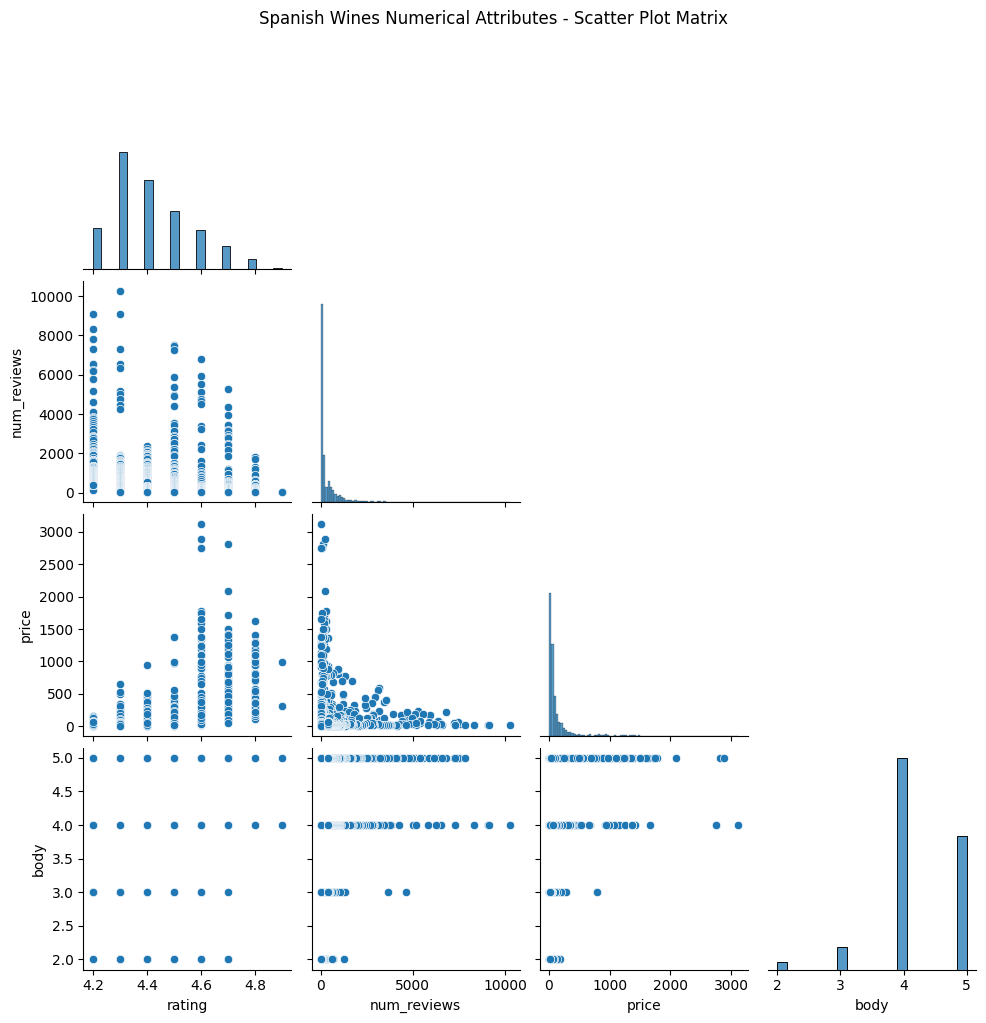

<Axes: >

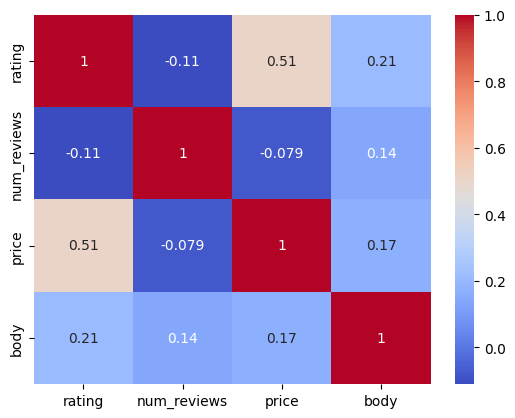

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.pairplot(df_numerical,
             corner=True
             )
plt.suptitle("Spanish Wines Numerical Attributes - Scatter Plot Matrix", y=1.02)
plt.show()

corr = df_numerical.corr() # correlation

sns.heatmap(corr, annot=True, cmap='coolwarm')

**Observations:**  

### 3. Histogram showing rating imbalance (if any)


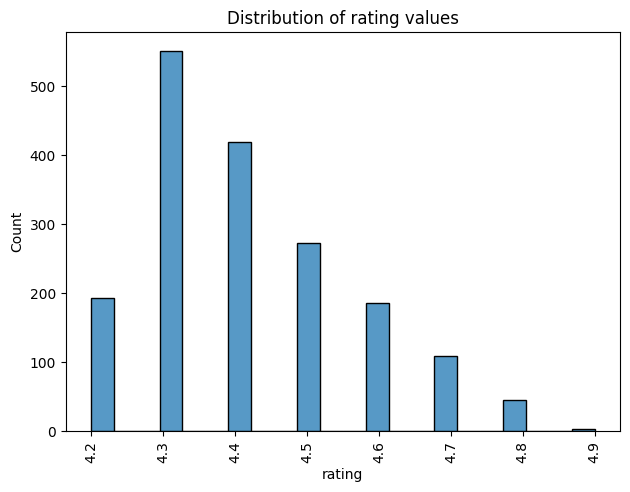

In [30]:
sns.histplot(df_numerical['rating'], kde=False)
plt.xticks(rotation=90)  
plt.tight_layout()
plt.title('Distribution of rating values')
plt.show()

**Observations:**  

### 4. Price-regression model + metrics + plot


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures 

# Split the DataFrame into training and test sets
train_df, test_df = train_test_split(df_numerical, test_size=0.2, random_state=0)

# Separate features and target for training and testing
X_train_df = train_df['rating']
y_train_df = train_df['price']
X_test_df = test_df['rating']
y_test_df = test_df['price']

# Standardize the features and target
sc_X = StandardScaler()
poly_X = PolynomialFeatures(degree=2)
sc_y = StandardScaler()
X_train_df_std = sc_X.fit_transform(X_train_df.values.reshape(-1, 1))
X_train_df_std_poly = poly_X.fit_transform(X_train_df_std)
y_train_df_std = sc_y.fit_transform(y_train_df.values.reshape(-1, 1))
X_test_df_std = sc_X.transform(X_test_df.values.reshape(-1, 1))
X_test_df_std_poly = poly_X.transform(X_test_df_std)
y_test_df_std = sc_y.transform(y_test_df.values.reshape(-1, 1))


from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train_df_std, y_train_df_std)
y_pred_std_df = lr.predict(X_test_df_std)
y_pred_df = sc_y.inverse_transform(y_pred_std_df.reshape(-1, 1))


lr_poly = LinearRegression()
lr_poly.fit(X_train_df_std_poly, y_train_df_std)
y_pred_std_poly_df = lr_poly.predict(X_test_df_std_poly)
y_pred_poly_df = sc_y.inverse_transform(y_pred_std_poly_df.reshape(-1, 1))


from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

mae = mean_absolute_error(y_test_df, y_pred_df)
mse = mean_squared_error(y_test_df, y_pred_df)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_df, y_pred_df)

print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R-squared (R²): {r2:.2f}')

mae_poly = mean_absolute_error(y_test_df, y_pred_poly_df)
mse_poly = mean_squared_error(y_test_df, y_pred_poly_df)
rmse_poly = np.sqrt(mse_poly)
r2_poly = r2_score(y_test_df, y_pred_poly_df)

print(f'Mean Absolute Error (MAE) for polynomial: {mae_poly:.2f}')
print(f'Mean Squared Error (MSE) for polynomial: {mse_poly:.2f}')
print(f'Root Mean Squared Error (RMSE) for polynomial: {rmse_poly:.2f}')
print(f'R-squared (R²) for polynomial: {r2_poly:.2f}')





Mean Absolute Error (MAE): 130.70
Mean Squared Error (MSE): 69375.28
Root Mean Squared Error (RMSE): 263.39
R-squared (R²): 0.22
Mean Absolute Error (MAE) for polynomial: 113.51
Mean Squared Error (MSE) for polynomial: 68183.77
Root Mean Squared Error (RMSE) for polynomial: 261.12
R-squared (R²) for polynomial: 0.23


**Observations:**  

### 5. Quality-regression model + metrics + plot


In [ ]:
# ---- Your code here ----

**Observations:**  

### 6. Over/under-fitting discussion and fix

In [ ]:
# ---- Your code here ----

**Observations:**  

### 7. Apply cross-validation or statistical analyses on the features or results of the regression models (advanced)

In [ ]:
# ---- Your code here ----

**Observations:**  